<a href="https://colab.research.google.com/github/jonitorta/Ejercicios_Machine_learning./blob/main/Bin_class_neural_net_ex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Movies opinion classifier.
In this notebook I'll implement an opinion classifier based on neural nets.
It's just for understanding Keras so data is already preprocessed.

In [75]:
#Import useful libraries
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import imdb
from tensorflow import keras
from datetime import date
from keras import layers

print(f"Python version:\n{sys.version}")
print(f"numpy version: {np.__version__}")
print(f"Keras version: {keras.__version__}")
print(f"Date of last run: {date.today()}")

Python version:
3.7.13 (default, Apr 24 2022, 01:04:09) 
[GCC 7.5.0]
numpy version: 1.21.6
Keras version: 2.8.0
Date of last run: 2022-07-18


In [16]:
(train_data, train_labels) , (test_data, test_labels) = imdb.load_data(
    num_words = 10000
)

17473536/17464789 [==============================] - 0s 0us/step


In [21]:
#Each element of a column from train data is an int that represent the number
#of times a word appeared in a review
print(f"train data shape: {train_data.shape}")
print(f"train data overview: {train_data[0][0:10]}")

train data shape: (25000,)
train data overview: [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65]


In [68]:
#Check labels
print(f"train_labels: {train_labels}")
#np.asarray is used to not create a copy of the element
y_train = np.asarray(train_labels).astype(np.float32)
y_test = np.asarray(test_labels).astype(np.float32)

train_labels: [1 0 0 ... 0 1 0]


In [43]:
#Get the word index
word_index = imdb.get_word_index()
type(word_index)

dict

In [47]:
#Let's create a matrix to store the data
def matrix_form(data, num_words = 10000):
  #Create a matrix of 0's 
  matrix = np.zeros((len(data),num_words))
  #Here we take the index of the review and the vector of words
  for i, num_words in enumerate(data):
    #Now we iterate over the vector of words, if for example the first
    #element of this vector is 200, then this will add 200 to the i,j entry of matrix
    for j in num_words:
      matrix[i,j] = 1
  return matrix 

In [48]:
#Let's transform to matrix form
X_train = matrix_form(train_data)
X_test = matrix_form(test_data)

In [59]:
#Save the words maybe we can use them later
words = list(word_index.keys())
words[0:6]

['fawn', 'tsukino', 'nunnery', 'sonja', 'vani', 'woods']

In [62]:
#Define the architecture, in this case 3 dense(fully conected) layers
#The last one is the output so it's just an scalar(1 for good, 0 for bad)
#Last activation is sigmoid because we want a number in [0,1]
model = keras.Sequential([
    layers.Dense(16, activation = "relu"),
    layers.Dense(16, activation = "relu"),
    layers.Dense(1, activation="sigmoid")
])

In [63]:
#This optimizer is a variation from GD, it uses the sign of the last two gradients
#and adapt the size of step based on that
#binary entropy is good for classification problems
#acurracy if a fine choice since dataset is fairly balanced
model.compile(optimizer = "rmsprop",
              loss = "binary_crossentropy",
              metrics = ["accuracy"])

In [71]:
#Create a validation set of 5000 elements
validation_size = 5000
x_val = X_train[:validation_size]
part_x_train = X_train[validation_size:]
y_val = y_train[:validation_size]
part_y_train = y_train[validation_size:]

In [73]:
#Train the model
history = model.fit(part_x_train,
                    part_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val))

Epoch 1/20
40/40 [==============================] - 3s 41ms/step - loss: 0.4948 - accuracy: 0.8046 - val_loss: 0.3672 - val_accuracy: 0.8730
Epoch 2/20
40/40 [==============================] - 1s 33ms/step - loss: 0.2879 - accuracy: 0.9067 - val_loss: 0.3200 - val_accuracy: 0.8700
Epoch 3/20
40/40 [==============================] - 1s 31ms/step - loss: 0.2113 - accuracy: 0.9283 - val_loss: 0.2681 - val_accuracy: 0.8936
Epoch 4/20
40/40 [==============================] - 1s 29ms/step - loss: 0.1718 - accuracy: 0.9413 - val_loss: 0.2866 - val_accuracy: 0.8854
Epoch 5/20
40/40 [==============================] - 1s 29ms/step - loss: 0.1464 - accuracy: 0.9503 - val_loss: 0.2804 - val_accuracy: 0.8904
Epoch 6/20
40/40 [==============================] - 1s 37ms/step - loss: 0.1227 - accuracy: 0.9596 - val_loss: 0.2970 - val_accuracy: 0.8894
Epoch 7/20
40/40 [==============================] - 2s 38ms/step - loss: 0.1073 - accuracy: 0.9657 - val_loss: 0.3149 - val_accuracy: 0.8862
Epoch 8/20
40

In [74]:
#Here we have the scores 
history_dic = history.history
history_dic.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [77]:
#Save this values to plot
loss = history_dic["loss"]
val_loss = history_dic["val_loss"]
accuracy = history_dic["accuracy"]
val_accuracy = history_dic["val_accuracy"]
epochs = range(22)

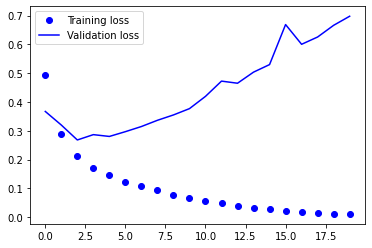

In [83]:
#We can se our model is bad, every epoch the loss in validation
#set increases so the model is overfitting 
plt.plot(epochs,loss, "bo", label = "Training loss")
plt.plot(epochs, val_loss, "b", label = "Validation loss")
plt.legend()
plt.show()

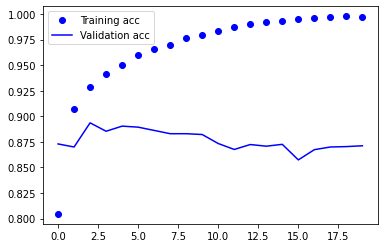

In [85]:
plt.plot(epochs, accuracy, "bo", label = "Training acc")
plt.plot(epochs, val_accuracy, "b", label = "Validation acc")
plt.legend()
plt.show()